In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:24
🔁 Restarting kernel...


In [5]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 34.2 MB/s eta 0:00:00


In [1]:
!conda install pycairo

Solving environment: - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pycairo


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |    ha61ee94_1014         1.5 MB  conda-forge
    conda-23.1.0               |   py39hf3d152e_0         906 KB  conda-forge
    expat-2.5.0                |       h27087fc_0         189 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB  conda-forge
    font-ttf-source-code-pro-2.038|       h77eed37_0         684 KB  conda-forge
    font-ttf-ubuntu-0.83       |       hab24e00_0         1.9 MB  conda-forge
    fontconfig-2.14.2          |       h14ed4e7_0         266 KB  conda-forge
    fonts-conda-ecosystem-1    |          

In [6]:
from igraph import *
import cairo
# Graph object contains two special members called vs and es, standing for the sequence of all vertices and all edges

IGRAPH D--- 4 4 --
+ attr: label (v)
+ edges:
0->1 1->2 2->3 3->0


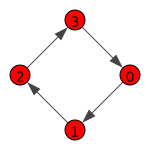

In [10]:
# Directed
graph1 = Graph(edges={(0,1), (1,2), (2,3), (3,0)}, directed=True)
graph1.vs['label'] = range(graph1.vcount())
print(graph1)
plot(graph1, bbox=(0,0,150,150))

In [11]:
# adjancency matrix
print(graph1.get_adjacency())

[[0, 1, 0, 0]
 [0, 0, 1, 0]
 [0, 0, 0, 1]
 [1, 0, 0, 0]]


IGRAPH UN-- 5 4 --
+ attr: label (v), name (v)
+ edges (vertex names):
None--None, None--None, None--None, None--None


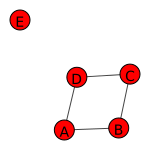

In [12]:
# Undirected
graph2 = Graph(directed=False)
graph2.add_vertices(4) # quantity of nodes to add 
graph2.add_vertex(7) # add one node
graph2.add_edges({(0,1), (1,2), (2,3), (3,0)}) # connections between nodes
graph2.vs['label'] = ['A', 'B', 'C', 'D', 'E']
print(graph2)
plot(graph2, bbox=(0,0,150,150))

IGRAPH DNWT 4 4 --
+ attr: color (v), label (v), name (v), tamanho (v), type (v), weight (e)
+ edges (vertex names):
test name->test name, test name->test name, test name->test name, test
name->test name


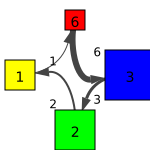

In [120]:
# Weighted
graph3 = Graph(edges={(0,1), (1,2), (2,3), (3,0)}, directed=True)

# vertices
graph3.vs['label'] = range(graph3.vcount())
graph3.vs['type'] = 'test type'
graph3.vs['name'] = 'test name'
graph3.vs['color'] = ['blue', 'green', 'yellow', 'red']
graph3.vs['tamanho'] = [50,40,30,20]

# edges
graph3.es['weight'] = [3,2,1,6]
graph3.vs['label'] = [3,2,1,6]

print(graph3)
plot(graph3, 
     bbox=(0,0,150,150), 
     vertex_size=graph3.vs['tamanho'], 
     vertex_shape='square', # e possivel usar imagens
     edge_width=graph3.es['weight'], 
     edge_label=graph3.es['weight'], 
     edge_curved=0.4)
# other options:
# vertex-color, vertex-shape

In [35]:
# node attributes
graph3.vs[3].attributes()

{'label': 6,
 'type': 'test type',
 'name': 'test name',
 'color': 'red',
 'tamanho': 20}

In [37]:
# edge attributes
graph3.es[0].attributes()

{'weight': 3}

### Metrics

https://alvinntnu.github.io/python-notes/statistical-analyses/network-analysis-igraph.html

https://towardsdatascience.com/newbies-guide-to-python-igraph-4e51689c35b4

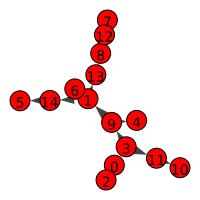

In [96]:
g = Graph.Tree_Game(15, directed=True, method='lerw')
g.vs['label'] = range(g.vcount())
plot(g, bbox=(200,200))

In [97]:
summary(g)

IGRAPH D--- 15 14 -- 
+ attr: label (v)


In [98]:
# show degrees
print(g.degree(mode='all'))
# show in degrees
print(g.degree(mode='in'))
# show out degrees
print(g.degree(mode='in'))

[2, 4, 1, 3, 1, 1, 1, 1, 2, 3, 1, 2, 2, 2, 2]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [106]:
# neighbours of a vertex
print(g.neighbors(5, mode=ALL))

[14]


In [128]:
# clusters of a vertex
clusters = g.clusters()
connected_components = g.connected_components()
print(clusters)
print(connected_components)

Clustering with 15 elements and 15 clusters
[ 0] 0
[ 1] 3
[ 2] 11
[ 3] 10
[ 4] 9
[ 5] 4
[ 6] 1
[ 7] 14
[ 8] 5
[ 9] 13
[10] 8
[11] 12
[12] 7
[13] 6
[14] 2
Clustering with 15 elements and 15 clusters
[ 0] 0
[ 1] 3
[ 2] 11
[ 3] 10
[ 4] 9
[ 5] 4
[ 6] 1
[ 7] 14
[ 8] 5
[ 9] 13
[10] 8
[11] 12
[12] 7
[13] 6
[14] 2


<ipython-input-128-d2a8d1d56a7d>:2: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  clusters = g.clusters()


In [122]:
# shortest path from to 
shortest_path_nodes = g.get_shortest_paths(3, to=10, output='vpath')
shortest_path_edges = g.get_shortest_paths(3, to=10, output='epath')

print(shortest_path_nodes, shortest_path_edges)

[[3, 11, 10]] [[9, 10]]


In [116]:
# identify all vertices whose degrees are greater than number.
r = g.vs.select(_degree_gt=2) # find nodes whose degress > 2
print(len(r))
for node in r:
  print(node.attributes())

3
{'label': 1}
{'label': 3}
{'label': 9}


In [110]:
## Find out edge of highest centrality
ebs = g.edge_betweenness()
max_eb = max(ebs)
[g.es[idx].tuple for idx, eb in enumerate(ebs) if eb == max_eb]

[(9, 1)]

In [ ]:
# betweenness way of detecting the amount of influence a node has over the flow of information in a graph. 
# It is often used to find nodes that serve as a bridge from one part of a graph to another

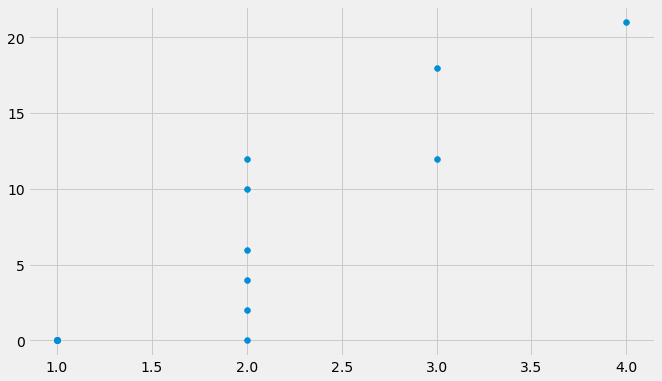

In [118]:
# degrees distribution
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
matplotlib.rcParams['figure.dpi']= 150

v_degree = g.degree()
v_betweenness = g.betweenness()

# correlation
plt.scatter(v_degree, v_betweenness)